#Author : Dinesh Sai Pappuru
NUID : 002784485
Course : DS5220

SML Final Project

Models used:

1. Linear kernel SVM

2. DNN without CNN


In [1]:
# Using colb to use the storage path. You dont need to use this code if you are running the code in your local machine
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Move the directory to a required location
%cd /content/drive/MyDrive/SML_Project/

/content/drive/MyDrive/SML_Project


In [3]:
ls

checkpoints_hybrid/  data/  DNN_v2.png  SML_Project_Dinesh.ipynb  svm0.png


#SVM with Linear Kernel

In [4]:
#packages
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'

In [6]:
# define classes
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
# Train test split data
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [8]:
xVal = xTrain[49000:, :].astype(float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(float)

In [9]:
# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


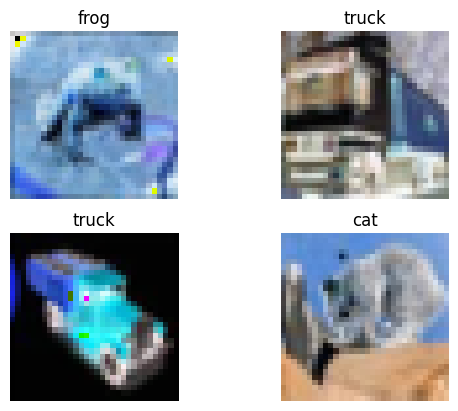

In [10]:
# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(((xTrain[0] * 255).astype(np.uint8)))
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(((xTrain[1] * 255).astype(np.uint8)))
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(((xVal[1] * 255).astype(np.uint8)))
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(((xTest[0] * 255).astype(np.uint8)))
plt.axis('off')
plt.title(classesName[yTest[0]])
plt.savefig(baseDir+'svm0.png')
plt.show()

In [11]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [12]:
#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ... 6 6 4]
(3000, 3072)
(3000,)


In [13]:
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test)) 

Train Accuracy = 0.354667
Test Accuracy = 0.098000
Train Accuracy = 0.484667
Test Accuracy = 0.188000
Train Accuracy = 0.709333
Test Accuracy = 0.253000
Train Accuracy = 0.989667
Test Accuracy = 0.286000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000


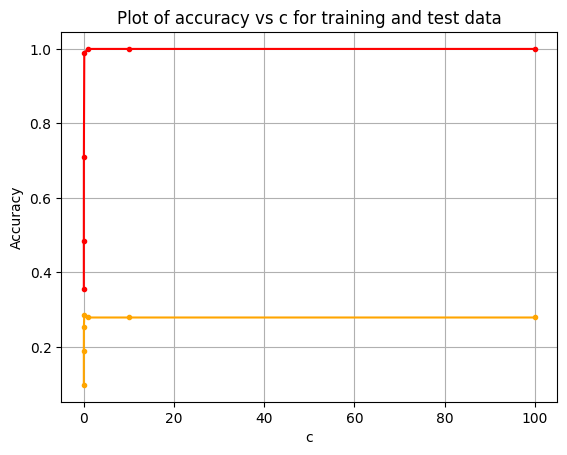

In [14]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [15]:
# Linear kernel SVM with c=0.1
svc = svm.SVC(probability = False, kernel = 'linear', C = 0.1)
svc.fit(xTrain, yTrain)

SVC(C=0.1, kernel='linear')

In [16]:
Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test)) 

Test Accuracy = 0.286000


In [17]:
def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors=3
    xsq = x.reshape((nrow,ncol,ncolors))
    plt.imshow(xsq)

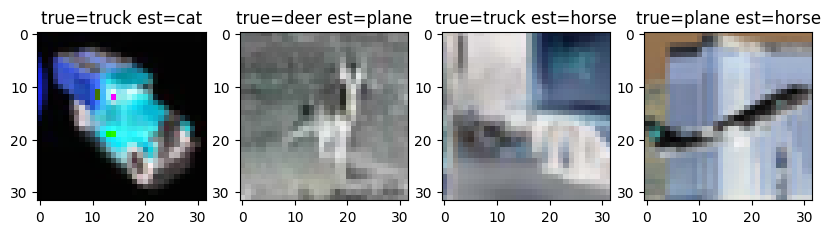

In [18]:
#Plotting some of the errors
Ierr = np.where((Yhat_svc_linear_test != yVal))[0]
nplt = 4
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]
     
    plt_img(((xVal[ind,:] * 255).astype(np.uint8)) )        
    title = 'true={0:s} est={1:s}'.format(classesName[yVal[ind].astype(int)], classesName[Yhat_svc_linear_test[ind].astype(int)])
    plt.title(title)

#DNN without Convolution layer

In [19]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [20]:
use_cuda = torch.cuda.is_available()

In [21]:
batch_size = 4

# These are the mean and standard deviation values for all pictures in the training set.
mean = (0.4914 ,  0.48216,  0.44653)
std = (0.24703,  0.24349,  0.26159)

# Class to denormalize images to display later.
class DeNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

# Creating instance of Functor
denorm = DeNormalize(mean, std)

# Load data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Do NOT shuffle the test set or else the order will be messed up
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

# Classes in order
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


  cat plane  ship plane


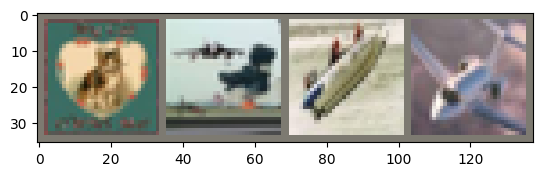

In [22]:
# functions to show an image
def imshow(img):
    img = denorm(img)    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
class Net_DNN(nn.Module):
    def __init__(self, architecture):
        super().__init__()
        self.layers = nn.ModuleList([
                                    nn.Linear(architecture[layer], architecture[layer + 1]) 
                                    for layer in range(len(architecture) - 1)])
        
    def forward(self, data):
        # Flatten the Tensor (i.e., dimensions 3 x 32 x 32) to a single column
        data = data.view(data.size(0), -1)
        for layer in self.layers:
            layer_data = layer(data)
            data = F.relu(layer_data)
        return F.log_softmax(layer_data, dim=-1)

In [24]:
# DNN
# You can change the size of the architecture layer based on your requirement
architecture = [32*32*3, 100, 100, 100, 100, 10]
net = Net_DNN(architecture)

if use_cuda:
    net = net.cuda() # Training on the GPU

criterion = nn.CrossEntropyLoss()

In [25]:
# Initialize a list of loss_results
loss_results = []

In [26]:
# Set the Learning rate and epoch start and end points
start_epoch = 1
end_epoch = 15
lr = 0.0001

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

for epoch in range(start_epoch, end_epoch+1):  # loop over the dataset multiple times
    print("Epoch:", epoch)
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # get the inputs
        if use_cuda:
            inputs, labels = inputs.cuda(), labels.cuda()

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels) # Inputs and Target values to GPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(running_loss / 2000)
            loss_results.append(running_loss / 2000)
            running_loss = 0.0
    # Create a path or folder before you continue with the code execution, If you do not want to save the model you can just comment the below 2 lines
    PATH = './checkpoints_hybrid/' + str(epoch)
    torch.save(net.state_dict(), PATH)

Epoch: 1
tensor(2.2996, device='cuda:0')
tensor(2.2841, device='cuda:0')
tensor(2.2222, device='cuda:0')
tensor(2.1372, device='cuda:0')
tensor(2.0552, device='cuda:0')
tensor(1.9731, device='cuda:0')
Epoch: 2
tensor(1.9053, device='cuda:0')
tensor(1.8819, device='cuda:0')
tensor(1.8389, device='cuda:0')
tensor(1.7835, device='cuda:0')
tensor(1.7491, device='cuda:0')
tensor(1.7169, device='cuda:0')
Epoch: 3
tensor(1.6591, device='cuda:0')
tensor(1.6570, device='cuda:0')
tensor(1.6390, device='cuda:0')
tensor(1.6368, device='cuda:0')
tensor(1.6185, device='cuda:0')
tensor(1.5838, device='cuda:0')
Epoch: 4
tensor(1.5343, device='cuda:0')
tensor(1.5523, device='cuda:0')
tensor(1.5386, device='cuda:0')
tensor(1.5255, device='cuda:0')
tensor(1.5167, device='cuda:0')
tensor(1.5188, device='cuda:0')
Epoch: 5
tensor(1.4586, device='cuda:0')
tensor(1.4559, device='cuda:0')
tensor(1.4582, device='cuda:0')
tensor(1.4480, device='cuda:0')
tensor(1.4456, device='cuda:0')
tensor(1.4509, device='cuda

In [27]:
# Comment the below line if you are not using gpu
loss_results = [i.cpu() for i in loss_results]

In [28]:
loss_results

[tensor(2.2996),
 tensor(2.2841),
 tensor(2.2222),
 tensor(2.1372),
 tensor(2.0552),
 tensor(1.9731),
 tensor(1.9053),
 tensor(1.8819),
 tensor(1.8389),
 tensor(1.7835),
 tensor(1.7491),
 tensor(1.7169),
 tensor(1.6591),
 tensor(1.6570),
 tensor(1.6390),
 tensor(1.6368),
 tensor(1.6185),
 tensor(1.5838),
 tensor(1.5343),
 tensor(1.5523),
 tensor(1.5386),
 tensor(1.5255),
 tensor(1.5167),
 tensor(1.5188),
 tensor(1.4586),
 tensor(1.4559),
 tensor(1.4582),
 tensor(1.4480),
 tensor(1.4456),
 tensor(1.4509),
 tensor(1.3974),
 tensor(1.3812),
 tensor(1.3852),
 tensor(1.4123),
 tensor(1.3840),
 tensor(1.3680),
 tensor(1.3419),
 tensor(1.3316),
 tensor(1.3299),
 tensor(1.3470),
 tensor(1.3244),
 tensor(1.3633),
 tensor(1.2731),
 tensor(1.2805),
 tensor(1.2856),
 tensor(1.3258),
 tensor(1.2856),
 tensor(1.3048),
 tensor(1.2476),
 tensor(1.2530),
 tensor(1.2545),
 tensor(1.2466),
 tensor(1.2566),
 tensor(1.2554),
 tensor(1.2241),
 tensor(1.2166),
 tensor(1.2275),
 tensor(1.2158),
 tensor(1.2119

GroundTruth:    cat  ship  ship plane


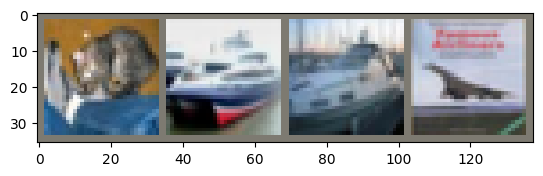

In [29]:
# load a min-batch of the images
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
# For the images shown above, show the predictions
# first activate GPU processing
images, labels = images.cuda(), labels.cuda()

# Feed forward
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat truck plane plane


In [31]:
# Small code snippet to determine test accuracy
correct = 0
total = 0
for data in testloader:
    # load images
    images, labels = data
    if use_cuda:
        images, labels = images.cuda(), labels.cuda()
    # feed forward
    outputs = net(Variable(images))
    # perform softmax regression
    _, predicted = torch.max(outputs.data, 1)
    # update stats
    total += labels.size(0)
    correct += (predicted == labels).sum()

# print the results
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [32]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    if use_cuda:
        images, labels = images.cuda(), labels.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

# Print the accuracy per class
for i in range(10):
    print(classes[i], 100 * class_correct[i] / class_total[i])

plane tensor(58.4000, device='cuda:0')
car tensor(68.3000, device='cuda:0')
bird tensor(32.5000, device='cuda:0')
cat tensor(27.9000, device='cuda:0')
deer tensor(51.5000, device='cuda:0')
dog tensor(38.5000, device='cuda:0')
frog tensor(70.6000, device='cuda:0')
horse tensor(54.0000, device='cuda:0')
ship tensor(69.6000, device='cuda:0')
truck tensor(55.7000, device='cuda:0')


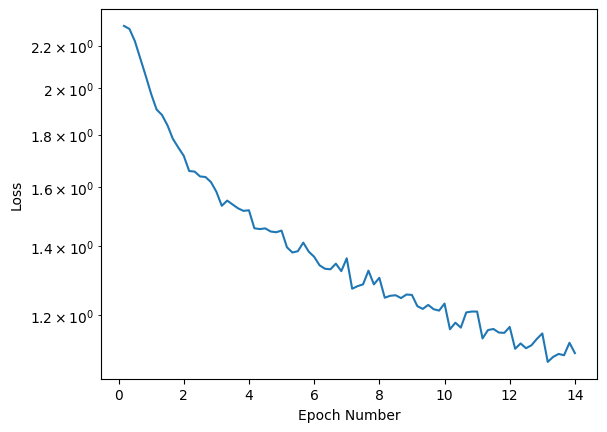

In [33]:
batch_size = 4
loss_samples_per_epoch = 6
num_epochs = 14
epochs_list = [(i/loss_samples_per_epoch) for i in range(1, num_epochs*loss_samples_per_epoch + 1)]
plt.semilogy(epochs_list, loss_results[:-6])
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.savefig('./DNN_v2.png', format='png', pad_inches=1, dpi=1200)